# Local Binary Patterns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn import preprocessing, metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
from skimage import img_as_ubyte
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage import feature, io, color
import random
from sklearn.utils import shuffle

In [ ]:
!git clone https://github.com/siddharth-iyer1/dsl_final_project_ai_vs_real_art.git

Cloning into 'dsl_final_project_ai_vs_real_art'...
remote: Enumerating objects: 5315, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 5315 (delta 88), reused 104 (delta 27), pack-reused 5125
Receiving objects: 100% (5315/5315), 258.31 MiB | 24.97 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Updating files: 100% (6842/6842), done.


In [ ]:
def load_and_extract_features(folder_path, label, alpha=1.0, beta=0.0):
    features = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image = imread(os.path.join(folder_path, filename))
            grayscale_image = rgb2gray(image)
            lbp_features = extract_lbp_features(grayscale_image)
            features.append(lbp_features)
            labels.append(label)
    return features, labels

In [ ]:
real_directory = '/content/dsl_final_project_ai_vs_real_art/ai/ai_vs_real/REAL'
fake_directory = '/content/dsl_final_project_ai_vs_real_art/ai/ai_vs_real/FAKE'

In [ ]:
def extract_lbp_features(image, P=32, R=3):
    lbp = local_binary_pattern(image, P, R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [ ]:
real_features, real_labels = load_and_extract_features(real_directory, 0)
fake_features, fake_labels = load_and_extract_features(fake_directory, 1)

In [ ]:
x_data = np.concatenate((real_features, fake_features), axis=0)
x_data_shuffle = random.shuffle(x_data)
y_data = np.concatenate((real_labels, fake_labels), axis=0)
y_data_shuffle = random.shuffle(y_data)

In [ ]:
print(x_data.shape)

(3410, 34)


In [ ]:
print(y_data.shape)

(3410,)


In [ ]:
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(real_features, real_labels, test_size=0.25, random_state=42)
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(fake_features, fake_labels, test_size=0.25, random_state=42)

In [ ]:
X_train = np.concatenate((X_real_train, X_fake_train), axis=0)
y_train = np.concatenate((y_real_train, y_fake_train), axis=0)
X_test = np.concatenate((X_real_test, X_fake_test), axis=0)
y_test = np.concatenate((y_real_test, y_fake_test), axis=0)

In [ ]:
x_train, y_train = shuffle(X_train, y_train, random_state=42)
x_test, y_test = shuffle(X_test, y_test, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

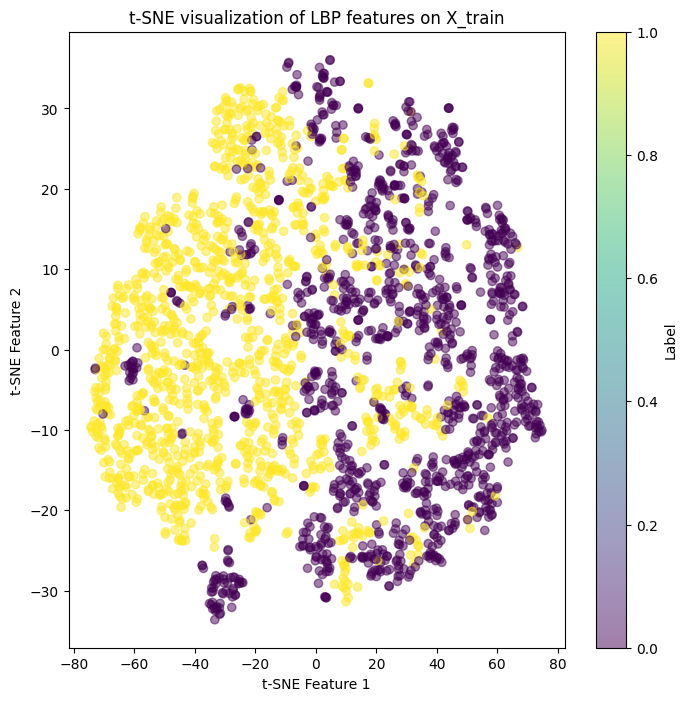

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, random_state=42)
x_data_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 8))
plt.scatter(x_data_tsne[:, 0], x_data_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Label')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of LBP features on X_train')
plt.show()

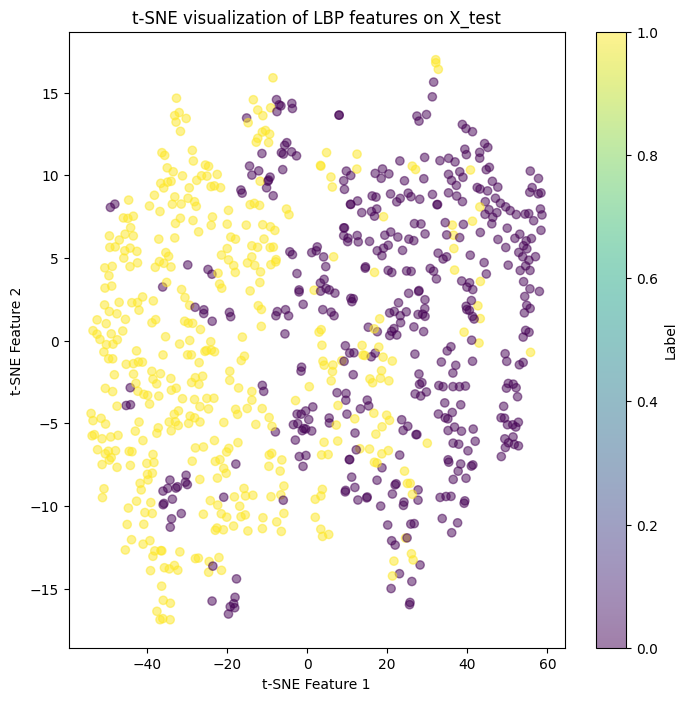

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, random_state=42)
x_data_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(x_data_tsne[:, 0], x_data_tsne[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar(label='Label')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of LBP features on X_test')
plt.show()

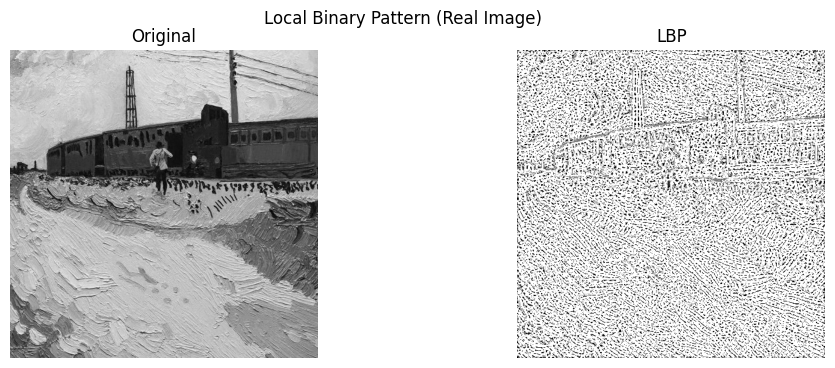

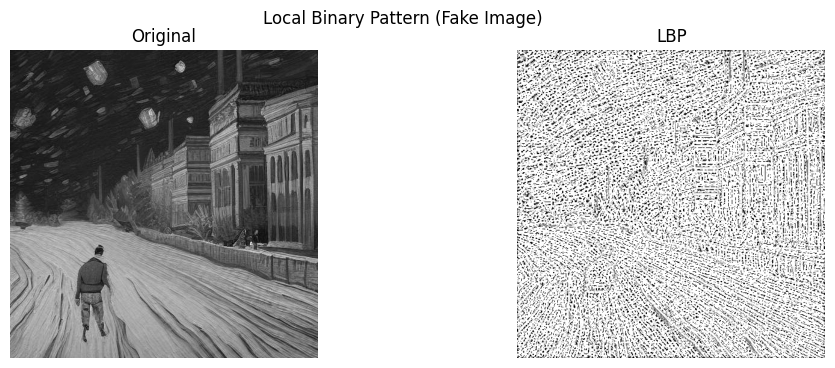

In [ ]:
radius = 3
n_points = 32 * radius

def plot_lbp(original_image, lbp_image, title):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True, sharey=True)
    ax1.imshow(original_image, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original')

    ax2.imshow(lbp_image, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('LBP')

    plt.suptitle(title)
    plt.show()

real_path = '/content/dsl_final_project_ai_vs_real_art/ai/ai_vs_real/REAL/28.jpg'
fake_path = '/content/dsl_final_project_ai_vs_real_art/ai/ai_vs_real/FAKE/1.jpg'
image_real = imread(real_path)
image_fake = imread(fake_path)
gray_image_real = rgb2gray(image_real)
gray_image_fake = rgb2gray(image_fake)

lbp_real = local_binary_pattern(gray_image_real, n_points, radius, method='uniform')
lbp_fake = local_binary_pattern(gray_image_fake, n_points, radius, method='uniform')

plot_lbp(gray_image_real, lbp_real, 'Local Binary Pattern (Real Image)')
plot_lbp(gray_image_fake, lbp_fake, 'Local Binary Pattern (Fake Image)')

In [ ]:
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
svm = GridSearchCV(SVC(kernel='rbf'), svm_params, cv=5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")
print("SVM Results:")
print(metrics.classification_report(y_test, y_pred_svm))

Accuracy: 0.9882903981264637
SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       427
           1       1.00      0.98      0.99       427

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [ ]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
print("Random Forest Results:")
print(metrics.classification_report(y_test, y_pred_rf))

Accuracy: 0.9531615925058547
Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       427
           1       0.96      0.94      0.95       427

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



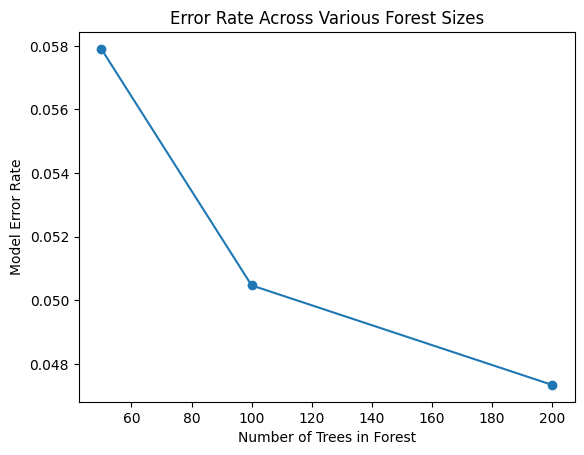

In [ ]:
errors = []

for n_trees in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=None, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    error = 1 - rf.oob_score_
    errors.append(error)

plt.plot([50, 100, 200], errors, '-o')
plt.xlabel('Number of Trees in Forest')
plt.ylabel('Model Error Rate')
plt.title('Error Rate Across Various Forest Sizes')
plt.show()

Sequential model with 2 fully connected layers.

* Layer 1 has 64 neurons and ReLU layer
* Input shape is the amount of features for each image
* Layer 2 is output layer - single neuron for binary classification (signmoid = 1; sigmoid = 0)

In [ ]:
nn = Sequential()
nn.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=64, batch_size=16, verbose=0)
y_pred_nn = (nn.predict(X_test) > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_nn}")
print("Neural Network Results:")
print(metrics.classification_report(y_test, y_pred_nn))

27/27 [==============================] - 0s 1ms/step
Accuracy: 0.9918032786885246
Neural Network Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       427
           1       0.99      0.99      0.99       427

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



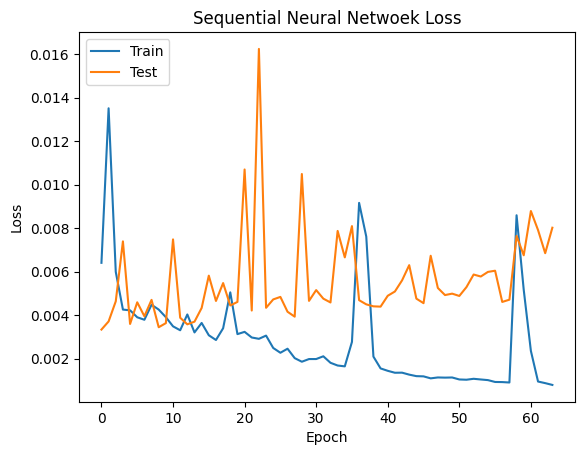

In [ ]:
import matplotlib.pyplot as plt

history = nn.fit(X_train, y_train, epochs=64, batch_size=16, verbose=0, validation_split=0.25)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Sequential Neural Netwoek Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def extract_lbp_features_indiv(image, P=32, R=3):
    """Extract LBP features from a grayscale image."""
    lbp = local_binary_pattern(image, P, R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [ ]:
def imread_grayscale(image_path):
    """Read an image and convert it to grayscale."""
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is not None and image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if image is not None else None

In [ ]:
def process_directory(directory_path):
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = imread(os.path.join(directory_path, filename))
            grayscale_image = rgb2gray(image)
            lbp_features = extract_lbp_features(grayscale_image).reshape(1, -1)
            raw_pred = nn.predict(lbp_features)
            predicted_class = (raw_pred > 0.83).astype(int)
            result = 'Human Generated' if predicted_class[0] == 0 else 'AI Generated'
            print(f"Image: {filename} - Prediction: {result}")
            print(f"Image: {filename} - Raw Prediction: {raw_pred}")

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from skimage.feature import local_binary_pattern

directory_path = '/content/test'
results = process_directory(directory_path)

1/1 [==============================] - 0s 70ms/step
Image: ai_van_gogh.png - Prediction: AI Generated
Image: ai_van_gogh.png - Raw Prediction: [[0.8476369]]
1/1 [==============================] - 0s 30ms/step
Image: ai_art.png - Prediction: AI Generated
Image: ai_art.png - Raw Prediction: [[0.9237283]]
1/1 [==============================] - 0s 57ms/step
Image: van_gogh_sunflowers_real.jpg - Prediction: Human Generated
Image: van_gogh_sunflowers_real.jpg - Raw Prediction: [[0.82474315]]
1/1 [==============================] - 0s 32ms/step
Image: vincent_van_gogh_real.jpg - Prediction: Human Generated
Image: vincent_van_gogh_real.jpg - Raw Prediction: [[0.7967767]]
1/1 [==============================] - 0s 94ms/step
Image: van_gogh_chair_real.jpg - Prediction: Human Generated
Image: van_gogh_chair_real.jpg - Raw Prediction: [[0.8214963]]
1/1 [==============================] - 0s 31ms/step
Image: ai_starry_night.png - Prediction: AI Generated
Image: ai_starry_night.png - Raw Prediction: [[